In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from keras.preprocessing import image
from keras.layers import Input, Dense, Conv2D, Conv3D, MaxPooling2D, MaxPooling3D, UpSampling2D, UpSampling3D
from keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


In [2]:
import os

dim = (100, 100)
channels = 3

poster_data = []
posters_dir = 'posters/'
for f in os.listdir(posters_dir):
    if f.endswith(".jpg"):
        img_path = posters_dir + f
        img = image.load_img(img_path, target_size=dim, color_mode='rgb')
        x = image.img_to_array(img)
        poster_data.append(x)
poster_data = np.array(poster_data)

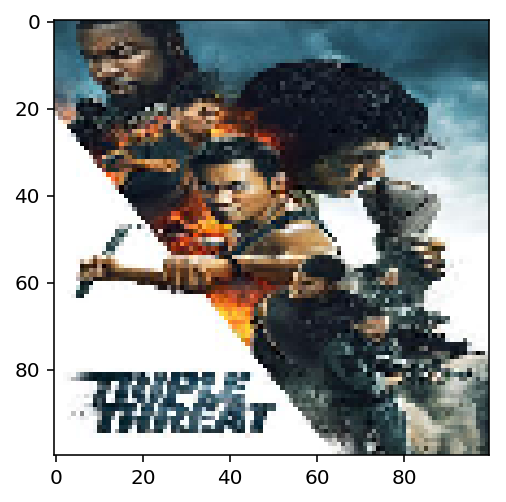

In [3]:
plt.imshow(poster_data[0]/255.)

In [4]:
train_data = poster_data[0:30]
test_data = poster_data[10:]

In [36]:
input_img = Input(shape=(dim[0], dim[1], channels))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same', 
           input_shape=(dim[0], dim[1], channels))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (13, 13, 8)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(channels, (3, 3), activation='sigmoid', padding='same', input_shape=(dim[0], 
    dim[1], channels), data_format="channels_last")(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

x_train = train_data.astype('float32') / 255.
x_test = test_data.astype('float32') / 255.

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=16,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 30 samples, validate on 30 samples
Epoch 1/100
30/30 [==============================] - 1s 49ms/step - loss: 0.6930 - val_loss: 0.6923
Epoch 2/100
30/30 [==============================] - 1s 23ms/step - loss: 0.6923 - val_loss: 0.6913
Epoch 3/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6914 - val_loss: 0.6901
Epoch 4/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6903 - val_loss: 0.6883
Epoch 5/100
30/30 [==============================] - 1s 23ms/step - loss: 0.6888 - val_loss: 0.6856
Epoch 6/100
30/30 [==============================] - 1s 25ms/step - loss: 0.6869 - val_loss: 0.6825
Epoch 7/100
30/30 [==============================] - 1s 27ms/step - loss: 0.6833 - val_loss: 0.6755
Epoch 8/100
30/30 [==============================] - 1s 23ms/step - loss: 0.6771 - val_loss: 0.6643
Epoch 9/100
30/30 [==============================] - 1s 22ms/step - loss: 0.6677 - val_loss: 0.6494
Epoch 10/100
30/30 [==============================] - 1s

Epoch 82/100
30/30 [==============================] - 1s 37ms/step - loss: 0.5562 - val_loss: 0.5535
Epoch 83/100
30/30 [==============================] - 1s 38ms/step - loss: 0.5535 - val_loss: 0.5397
Epoch 84/100
30/30 [==============================] - 1s 35ms/step - loss: 0.5379 - val_loss: 0.5361
Epoch 85/100
30/30 [==============================] - 1s 29ms/step - loss: 0.5350 - val_loss: 0.5352
Epoch 86/100
30/30 [==============================] - 1s 26ms/step - loss: 0.5345 - val_loss: 0.5358
Epoch 87/100
30/30 [==============================] - 1s 29ms/step - loss: 0.5362 - val_loss: 0.5411
Epoch 88/100
30/30 [==============================] - 1s 33ms/step - loss: 0.5436 - val_loss: 0.5580
Epoch 89/100
30/30 [==============================] - 1s 23ms/step - loss: 0.5684 - val_loss: 0.5604
Epoch 90/100
30/30 [==============================] - 1s 26ms/step - loss: 0.5554 - val_loss: 0.5368
Epoch 91/100
30/30 [==============================] - 1s 27ms/step - loss: 0.5348 - val_los

In [37]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)
decoded_imgs = autoencoder.predict(x_test)


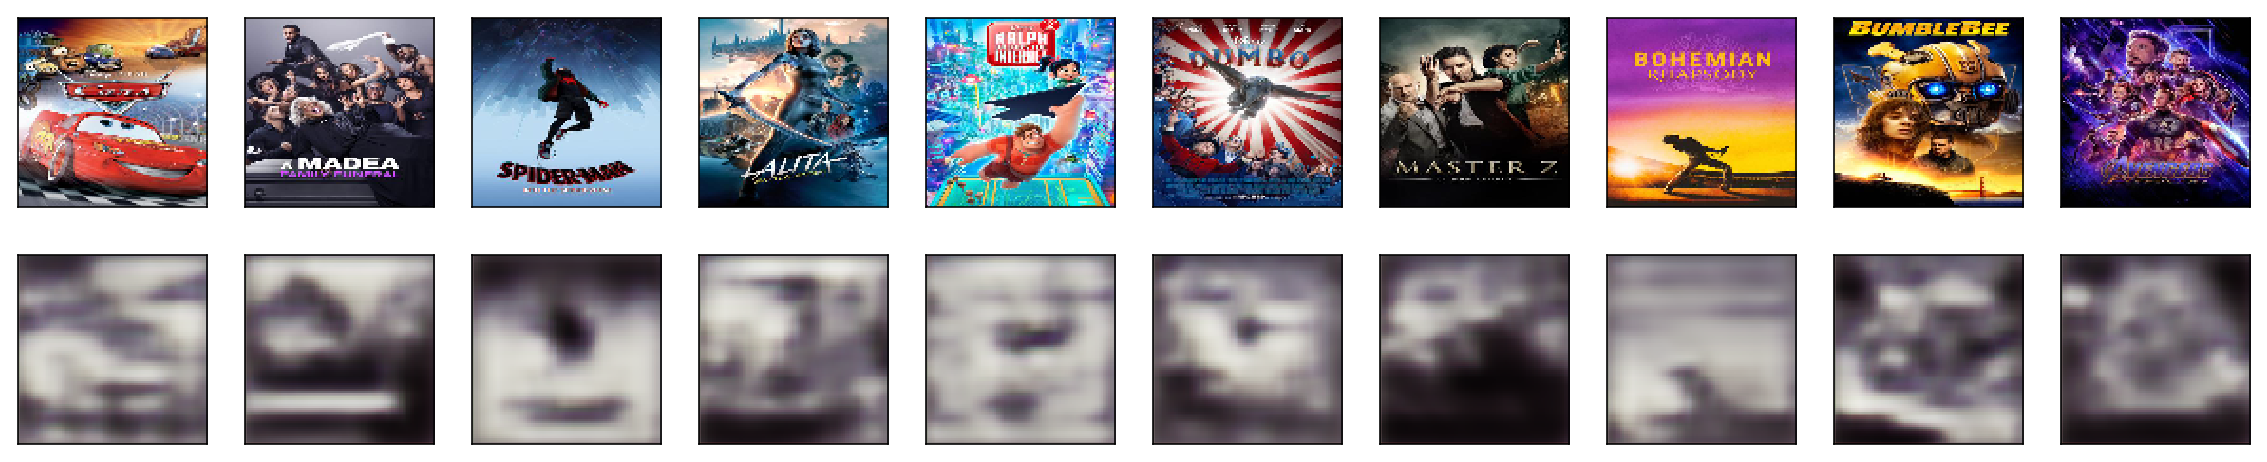

In [38]:

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i])
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+1 + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


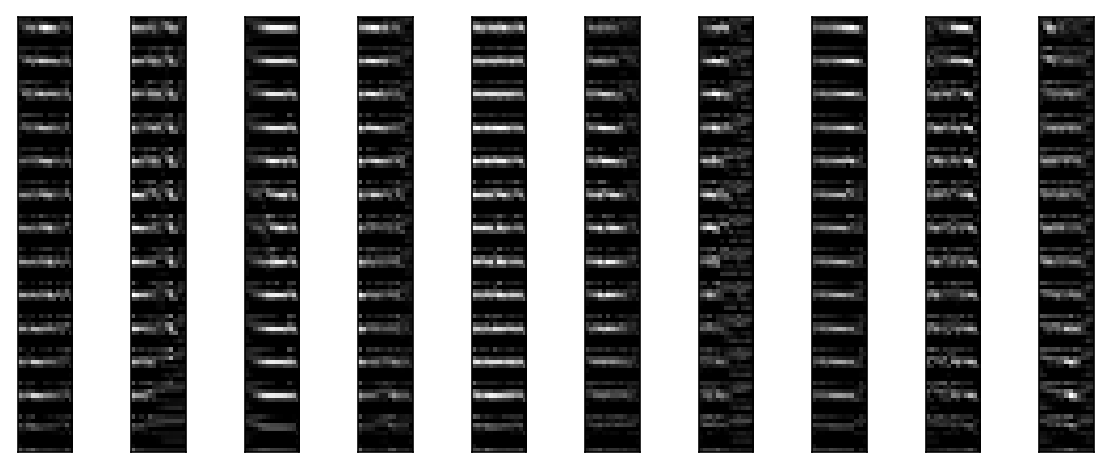

In [39]:

n = 10
plt.figure(figsize=(10, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs[i].reshape(13, 13 * 8).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


In [40]:
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 50, 50, 8)         2312      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 8)         0         
__________

In [41]:
encoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 100, 100, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 50, 50, 8)         2312      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 25, 25, 8)         0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 25, 25, 8)         584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 8)         0         
Total para